---
# **PyCaret for Clustering**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>**

2. Documentation on Pycaret-Clustering: **<a href="https://pycaret.readthedocs.io/en/latest/api/clustering.html"> Click Here </a>**

---


### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'3.0.2'

---
# **1. Clustering - Part 1 (Kmean Clustering)**
---
### **1.1 Get the list of datasets available in pycaret (55)**

In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "jewellery" dataset**
---

In [4]:
jewelleryDataSet = get_data("jewellery")    # SN is 30
# This is unsupervised dataset.
# No target is defined.

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


---
### **1.3 Download the "jewellery" dataset to local system**
---

In [5]:
jewelleryDataSet.to_csv("jewelleryDataSet.csv")
from google.colab import files
#files.download('jewelleryDataSet.csv')

  ---
### **1.4 "Parameter setting"  for clustering model**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [8]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(jewelleryDataSet, )
# Re-run the code if any error occur

,Description,Value
0,Session id,2587
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


---
### **1.5 Building "KMean" clustering model**
---

In [69]:
KMeanClusteringModel = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **1.6 Assign Model - "Assign the labels" to the dataset**
---



In [70]:
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 1
1,59,81799,0.791082,5417.661621,Cluster 1
2,62,74751,0.702657,9258.993164,Cluster 1
3,59,74373,0.765680,7346.334473,Cluster 1
4,87,17760,0.348778,16869.507812,Cluster 0
...,...,...,...,...,...
500,28,101206,0.387441,14936.775391,Cluster 2
501,93,19934,0.203140,17969.693359,Cluster 0
502,90,35297,0.355149,16091.402344,Cluster 0
503,91,20681,0.354679,18401.087891,Cluster 0


---
### **1.7 "Saving" the result**
---



In [71]:
kMeanPrediction.to_csv("KMeanResult.csv")
print("Result file save sucessfully!!")

Result file save sucessfully!!


---
### **1.8 Download the "result file" to user local system**
---

In [72]:
from google.colab import files
#files.download('KMeanResult.csv')      # Uncomment this line
# Open and Explore result file (KMeanResult.csv).

---
# **2. Clustering: Saving and Loading the Model**
---
### **2.1 Save the "trained model"**
---

In [73]:
x = save_model(KMeanClusteringModel, 'kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Saved


---
### **2.2 Download the "trained model**
---

In [74]:
from google.colab import files
#files.download('kMeanClusteringModelFile.pkl')      # Uncomment this line

---
### **2.3 Load the model**
---
##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine

In [75]:
KMeanClusteringModel1 = load_model('kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Loaded


---
### **2.4 Upload and Load the trained model to "Colab Environment"**
---
##### **Upload the trained model**

In [76]:
from google.colab import files
#files.upload()                     # Uncomment this line

##### **Load the trained model**

In [77]:
#KMeanClusteringModel1 = load_model('kMeanClusteringModelFile (1)')

---
# **3. Clustering: Cluster the new dataset (Unseen Data)**
---
### **3.1 Select some data or upload user dataset file**

In [78]:
# Select top 10 rows
newData = get_data("jewellery").iloc[:10]

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


---
### **3.2 Make prediction on the new dataset (Unseen Data)**
---

In [79]:
newPredictions = predict_model(KMeanClusteringModel, data = newData)
newPredictions

,Age,Income,SpendingScore,Savings,Cluster
0,58.0,77769.0,0.791329,6559.829923,Cluster 1
1,59.0,81799.0,0.791082,5417.661426,Cluster 1
2,62.0,74751.0,0.702657,9258.992965,Cluster 1
3,59.0,74373.0,0.765680,7346.334504,Cluster 1
4,87.0,17760.0,0.348778,16869.507130,Cluster 0
5,29.0,131578.0,0.847034,3535.514352,Cluster 2
6,54.0,76500.0,0.785198,6878.884249,Cluster 1
7,87.0,42592.0,0.355290,18086.287158,Cluster 0
8,83.0,34384.0,0.324719,14783.379086,Cluster 0
9,84.0,27693.0,0.367063,17879.558906,Cluster 0


---
### **3.3 Save the prediction result to csv**
---

In [80]:
newPredictions.to_csv("NewPredictions.csv")
print("Result file save sucessfully!!")

Result file save sucessfully!!


---
# **4. Clustering: Ploting the Cluster**
---
```
- Cluster PCA Plot (2d)          'cluster'
- Cluster TSnE (3d)              'tsne'
- Elbow Plot                     'elbow'
- Silhouette Plot                'silhouette'
- Distance Plot                  'distance'
- Distribution Plot              'distribution'
```

---
### **4.1 Evaluate Cluster Model**
---

In [81]:
evaluate_model(KMeanClusteringModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

---
### **4.2 2D-plot for Cluster**
---

In [82]:
plot_model(KMeanClusteringModel, plot='cluster')

---
### **4.3 3D-plot for Cluster**
---

In [83]:
plot_model(KMeanClusteringModel, plot = 'tsne')

---
### **4.4 Elbow Plot**
---

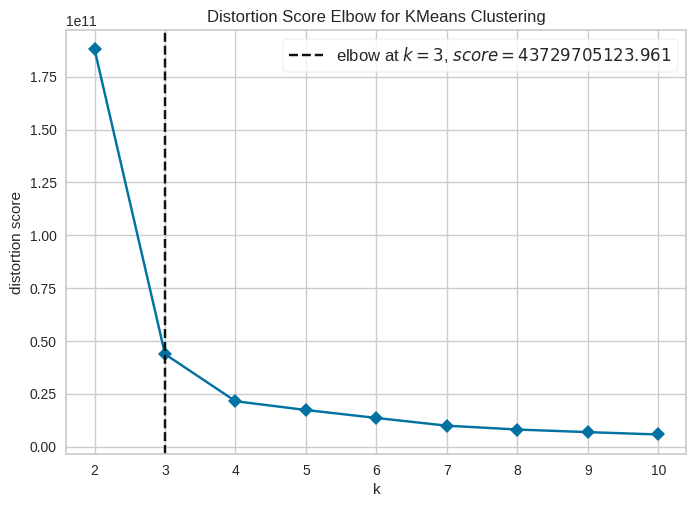

In [84]:
plot_model(KMeanClusteringModel, plot = 'elbow')

---
### **4.5 Silhouette Plot**
---

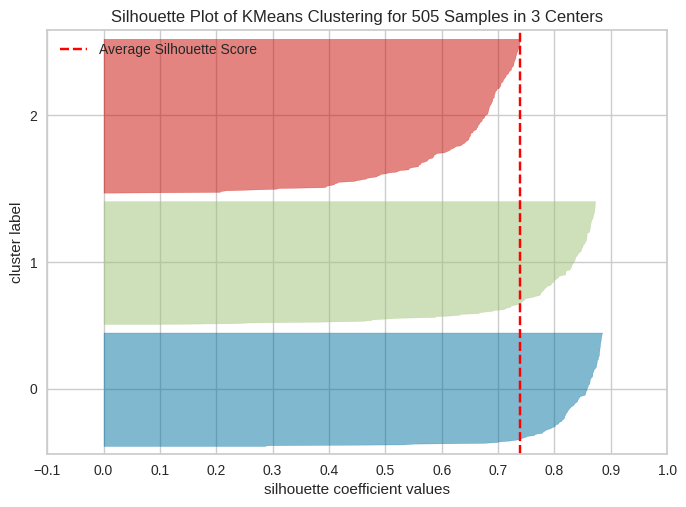

In [85]:
plot_model(KMeanClusteringModel, plot = 'silhouette')

---
### **4.6 Distribution Plot**
---

In [86]:
plot_model(KMeanClusteringModel, plot = 'distribution')

---
### **4.7 Distance Plot**
---

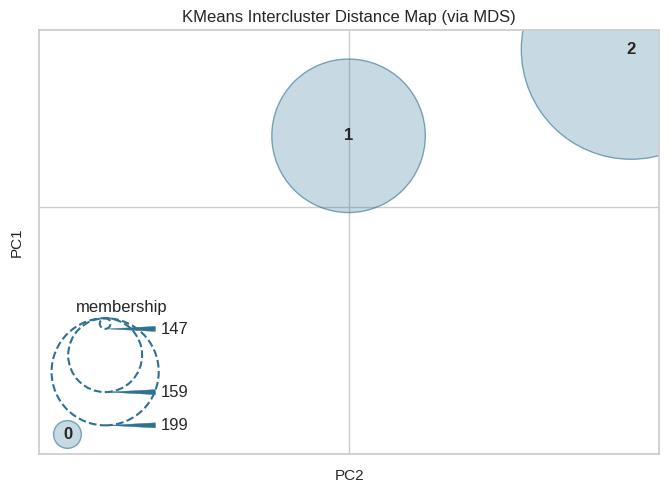

In [87]:
plot_model(KMeanClusteringModel, plot = 'distance')

---
# **5. Compelete Code for Clustering (KMean)**
---
### **5.1 For Cluster = 3**

In [88]:
from pycaret.datasets import get_data
from pycaret.clustering import *

jewelleryDataSet = get_data('jewellery')
setup(data = jewelleryDataSet,)
x = create_model('kmeans', num_clusters = 3)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


,Description,Value
0,Session id,6426
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **5.2 For Cluster = 4**
---

In [89]:
from pycaret.datasets import get_data
from pycaret.clustering import *

jewelleryDataSet = get_data('jewellery')
setup(data = jewelleryDataSet, )
x = create_model('kmeans', num_clusters = 4)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


,Description,Value
0,Session id,7580
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **5.3 Other Clustering Algorithms**
---
```
- K-Means clustering                 'kmeans'
- Affinity Propagation               'ap'
- Mean shift clustering              'meanshift'
- Spectral Clustering                'sc'
- Agglomerative Clustering           'hclust'
- Density-Based Spatial Clustering   'dbscan'
- OPTICS Clustering                  'optics'
- Birch Clustering                   'birch'
- K-Modes clustering                 'kmodes'
```

---
# **6. Clustering: Apply "Data Preprocessing"**
---
### **Read the Dataset**

In [90]:
from pycaret.clustering import *
from pycaret.datasets import get_data

jewelleryDataSet = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


---
### **6.1 Model Performance using "Normalization"**
---
### **6.1.1 Elbow Plot**


,Description,Value
0,Session id,1146
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

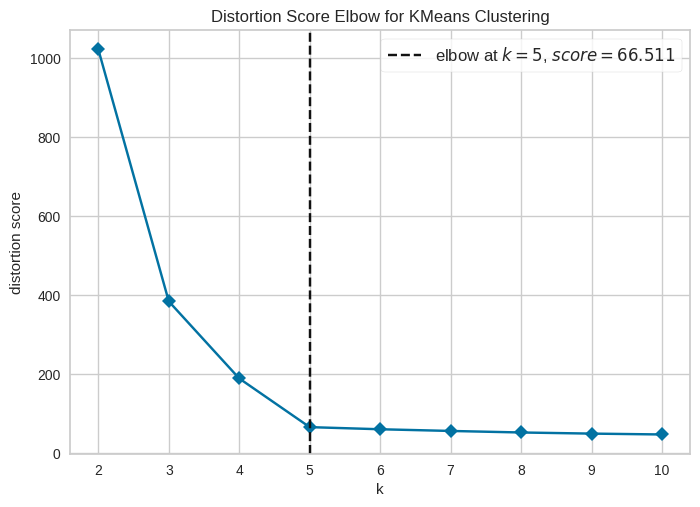

In [91]:
setup(data = jewelleryDataSet, normalize = True, normalize_method = 'zscore', )
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

---
### **6.1.2 For Cluster = 3**
---

In [92]:
setup(data = jewelleryDataSet, normalize = True, normalize_method = 'zscore',)
x = create_model('kmeans', num_clusters = 3)

,Description,Value
0,Session id,535
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6963,1066.5812,0.5258,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.1.3 For Cluster = 4**
---

In [93]:
setup(data = jewelleryDataSet, normalize = True, normalize_method = 'zscore', )
x = create_model('kmeans', num_clusters = 4)

,Description,Value
0,Session id,2336
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.1.4 For Cluster = 5**
---

In [94]:
setup(data = jewelleryDataSet, normalize = True, normalize_method = 'zscore', )
x = create_model('kmeans', num_clusters = 5)

,Description,Value
0,Session id,5462
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8049,3671.3580,0.2762,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.1.5 3D Plot for Cluster = 5**
---

In [95]:
setup(data = jewelleryDataSet, normalize = True, normalize_method = 'zscore', )
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'tsne')

,Description,Value
0,Session id,6671
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8049,3671.3580,0.2762,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.2 Model Performance using "Transformation"**
---

### **6.2.1 Elbow Plot**


,Description,Value
0,Session id,2872
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7809,3519.5778,0.3135,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

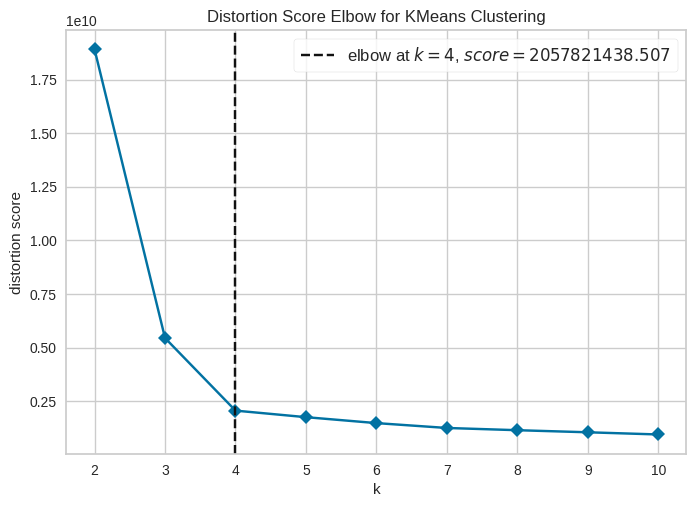

In [96]:
setup(data = jewelleryDataSet, transformation = True, transformation_method = 'yeo-johnson', )
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

---
### **6.2.2 For Cluster = 3**
---

In [97]:
setup(data = jewelleryDataSet, transformation = True, transformation_method = 'yeo-johnson',)
x = create_model('kmeans', num_clusters = 3)

,Description,Value
0,Session id,8099
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7383,1843.8285,0.3816,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.2.3 For Cluster = 4**
---

In [98]:
setup(data = jewelleryDataSet, transformation = True, transformation_method = 'yeo-johnson', )
x = create_model('kmeans', num_clusters = 4)

,Description,Value
0,Session id,8473
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7809,3519.5778,0.3135,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.2.4 For Cluster = 5**
---

In [99]:
setup(data = jewelleryDataSet, transformation = True, transformation_method = 'yeo-johnson', )
x = create_model('kmeans', num_clusters = 5)

,Description,Value
0,Session id,2072
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6567,3113.1150,0.5844,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.3 Model Performance using "PCA"**
---
### **6.3.1 Elbow Plot**

,Description,Value
0,Session id,6893
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,PCA,True
9,PCA method,linear


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

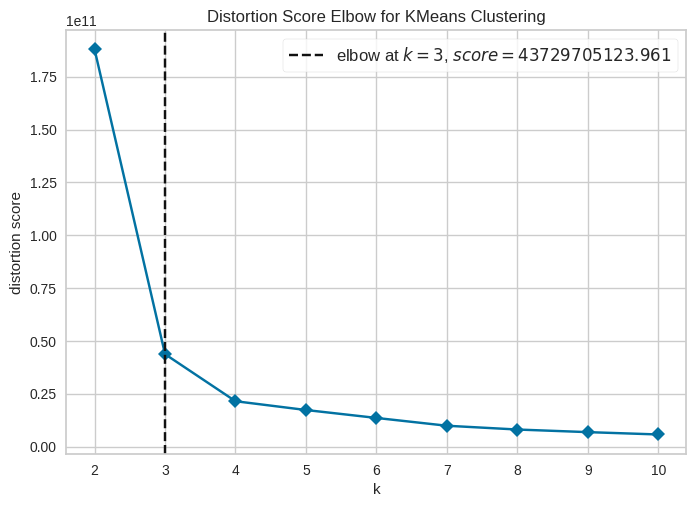

In [100]:
setup(data = jewelleryDataSet, pca = True, pca_method = 'linear', )
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

---
### **6.3.2 For Cluster = 3**
---

In [101]:
setup(data = jewelleryDataSet, pca = True, pca_method = 'linear', )
x = create_model('kmeans', num_clusters = 3)

,Description,Value
0,Session id,8843
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,PCA,True
9,PCA method,linear


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.3.3 For Cluster = 4**
---

In [102]:
setup(data = jewelleryDataSet, pca = True, pca_method = 'linear', )
x = create_model('kmeans', num_clusters = 4)

,Description,Value
0,Session id,2803
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,PCA,True
9,PCA method,linear


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.3.4 For Cluster = 5**
---

In [103]:
setup(data = jewelleryDataSet, pca = True, pca_method = 'linear', )
x = create_model('kmeans', num_clusters = 5)

,Description,Value
0,Session id,7784
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,PCA,True
9,PCA method,linear


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6777,4685.1995,0.4596,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.4 Model Performance using "Transformation" + "Normalization"**
---
### **6.4.1 Elbow Plot**

,Description,Value
0,Session id,8974
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

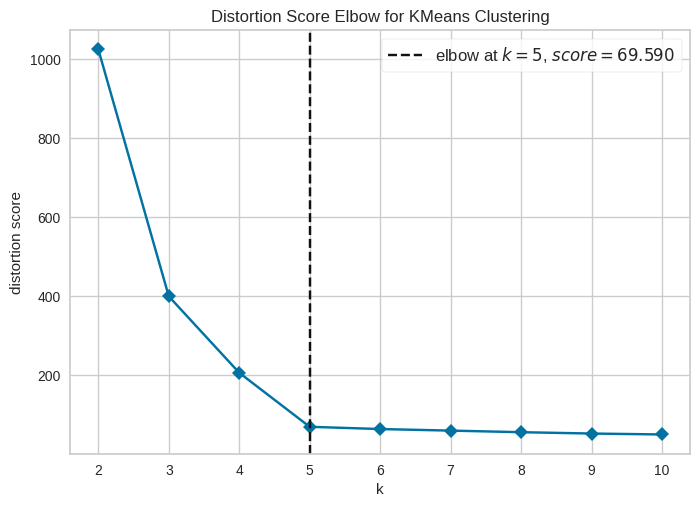

In [104]:
setup(data = jewelleryDataSet, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', )
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

---
### **6.4.2 For Cluster = 3**
---

In [105]:
setup(data = jewelleryDataSet, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', )
x = create_model('kmeans', num_clusters = 3)

,Description,Value
0,Session id,8473
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6912,1016.4677,0.5410,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.4.3 For Cluster = 4**
---

In [106]:
setup(data = jewelleryDataSet, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', )
x = create_model('kmeans', num_clusters = 4)

,Description,Value
0,Session id,4468
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.4.4 For Cluster = 5**
---

In [107]:
setup(data = jewelleryDataSet, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', )
x = create_model('kmeans', num_clusters = 5)

,Description,Value
0,Session id,3608
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8063,3503.4024,0.2748,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.5 Model Performance using "Transformation" + "Normalization" + "PCA"**
---
### **6.5.1 Elbow Plot**

,Description,Value
0,Session id,5463
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

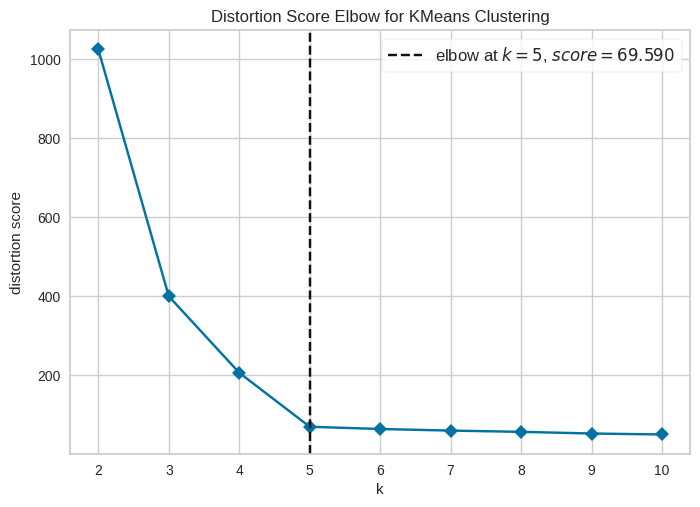

In [108]:
setup(data = jewelleryDataSet, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', )
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

---
### **6.5.2 For Cluster = 3**
---

In [109]:
setup(data = jewelleryDataSet, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', )
x = create_model('kmeans', num_clusters = 3)

,Description,Value
0,Session id,5729
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6912,1016.4677,0.5410,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.5.3 For Cluster = 4**
---

In [110]:
setup(data = jewelleryDataSet, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear',)
x = create_model('kmeans', num_clusters = 4)

,Description,Value
0,Session id,4436
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.5.4 For Cluster = 5**
---

In [111]:
setup(data = jewelleryDataSet, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', )
x = create_model('kmeans', num_clusters = 5)

,Description,Value
0,Session id,6999
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8063,3503.4024,0.2748,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
# **7. Other Clustering Techniques**
---
```
K-Means clustering                 'kmeans'
Affinity Propagation               'ap'
Mean shift clustering              'meanshift'
Spectral Clustering                'sc'
Agglomerative Clustering           'hclust'
Density-Based Spatial Clustering   'dbscan'
OPTICS Clustering                  'optics'
Birch Clustering                   'birch'
K-Modes clustering                 'kmodes'
```

---
### **7.1 Buildign Agglomerative (Hierarchical) clustering model**
---

In [112]:
from pycaret.datasets import get_data
from pycaret.clustering import *

jewelleryDataSet = get_data('jewellery')
setup(data = jewelleryDataSet, )
hierarchicalModel = create_model('hclust', num_clusters=3)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


,Description,Value
0,Session id,1179
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7391,3542.6251,0.3407,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **7.1.1 Assign Model - "Assign the labels" to the dataset**
---



In [113]:
hierarchicalModelPrediction = assign_model(hierarchicalModel)
hierarchicalModelPrediction

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 2
1,59,81799,0.791082,5417.661621,Cluster 2
2,62,74751,0.702657,9258.993164,Cluster 2
3,59,74373,0.765680,7346.334473,Cluster 2
4,87,17760,0.348778,16869.507812,Cluster 1
...,...,...,...,...,...
500,28,101206,0.387441,14936.775391,Cluster 0
501,93,19934,0.203140,17969.693359,Cluster 1
502,90,35297,0.355149,16091.402344,Cluster 1
503,91,20681,0.354679,18401.087891,Cluster 1


---
### **7.1.2 Evaluate Agglomerative (Hierarchical) Clustering**
---

In [114]:
evaluate_model(hierarchicalModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

---
### **7.2 Density-Based Spatial Clustering**
---

In [115]:
from pycaret.datasets import get_data
from pycaret.clustering import *

jewelleryDataSet = get_data('jewellery')
setup(data = jewelleryDataSet, )
dbscanModel = create_model('dbscan')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


,Description,Value
0,Session id,7605
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **7.2.1 Assign Model - "Assign the labels" to the dataset**
---



In [116]:
dbscanModelPrediction = assign_model(dbscanModel)
dbscanModelPrediction

# Noisy samples are given the label -1 i.e. 'Cluster -1'

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster -1
1,59,81799,0.791082,5417.661621,Cluster -1
2,62,74751,0.702657,9258.993164,Cluster -1
3,59,74373,0.765680,7346.334473,Cluster -1
4,87,17760,0.348778,16869.507812,Cluster -1
...,...,...,...,...,...
500,28,101206,0.387441,14936.775391,Cluster -1
501,93,19934,0.203140,17969.693359,Cluster -1
502,90,35297,0.355149,16091.402344,Cluster -1
503,91,20681,0.354679,18401.087891,Cluster -1


### **Key Points**

- num_clusters not required for some of the clustering Alorithms (Affinity Propagation ('ap'), Mean shift
  clustering ('meanshift'), Density-Based Spatial Clustering ('dbscan') and OPTICS Clustering ('optics')).
- num_clusters param for these models are automatically determined.

- When fit doesn't converge in Affinity Propagation ('ap') model, all datapoints are labelled as -1.

- Noisy samples are given the label -1, when using Density-Based Spatial  ('dbscan') or OPTICS Clustering ('optics').

- OPTICS ('optics') clustering may take longer training times on large datasets.


---
# **8. Deploy the model on AWS**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/clustering.html#pycaret.clustering.deploy_model">Click Here</a>**